In [2]:
!pip install opencv-python
import cv2
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

array([[[200, 179, 157],
        [200, 179, 157],
        [200, 179, 157],
        ...,
        [195, 181, 158],
        [194, 180, 157],
        [193, 179, 156]],

       [[200, 179, 157],
        [200, 179, 157],
        [200, 179, 157],
        ...,
        [196, 182, 159],
        [194, 180, 157],
        [193, 179, 156]],

       [[200, 179, 157],
        [200, 179, 157],
        [200, 179, 157],
        ...,
        [196, 182, 159],
        [195, 181, 158],
        [193, 179, 156]],

       ...,

       [[ 26,  58, 158],
        [ 30,  59, 163],
        [ 33,  59, 165],
        ...,
        [154, 120,  84],
        [154, 120,  84],
        [154, 120,  84]],

       [[ 30,  62, 162],
        [ 32,  61, 165],
        [ 35,  61, 167],
        ...,
        [154, 120,  84],
        [154, 120,  84],
        [154, 120,  84]],

       [[ 35,  67, 167],
        [ 34,  63, 167],
        [ 36,  62, 168],
        ...,
        [153, 119,  83],
        [153, 119,  83],
        [153, 119,  83]]], dtype=uint8)
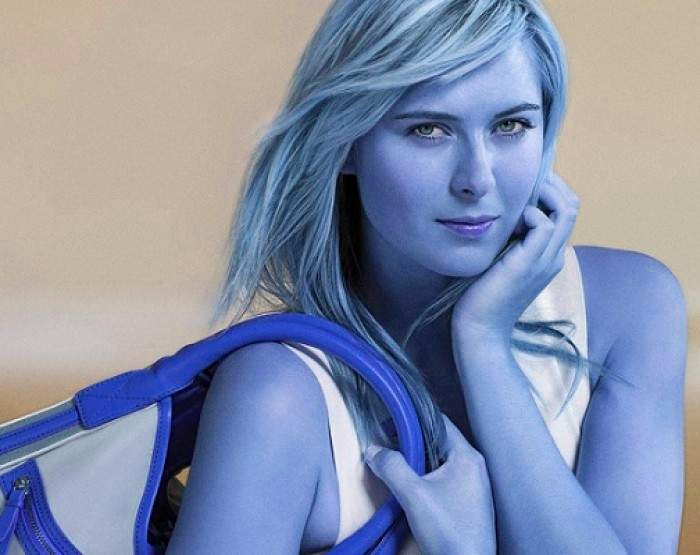

In [3]:
img = cv2.imread('/content/drive/MyDrive/Image classification project/model/test_images/sharapova1.jpg')
img.shape
img

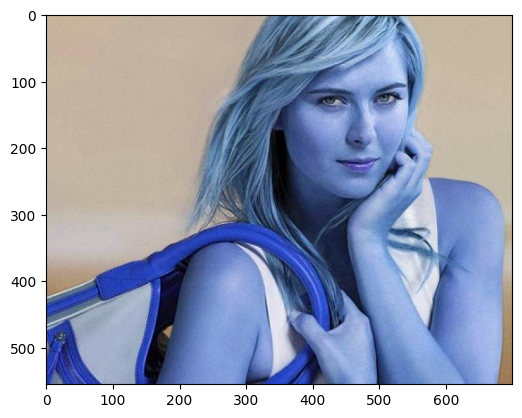

In [4]:
plt.imshow(img)

In [5]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

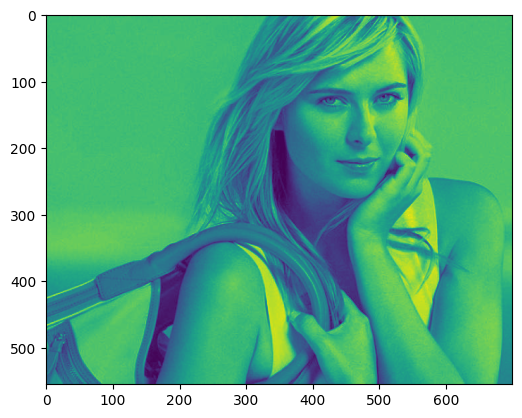

In [6]:
plt.imshow(gray)

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)
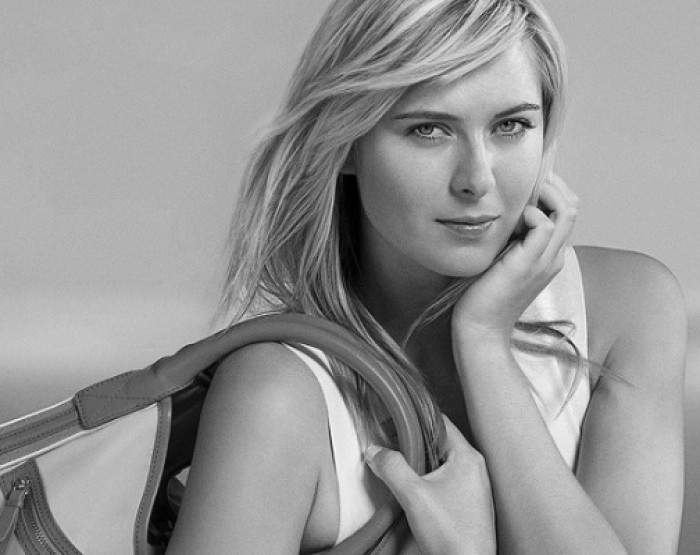

In [7]:
gray

In [8]:
face_cascade= cv2.CascadeClassifier('/content/drive/MyDrive/Image classification project/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade= cv2.CascadeClassifier('/content/drive/MyDrive/Image classification project/model/opencv/haarcascades/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[352,  38, 233, 233]], dtype=int32)

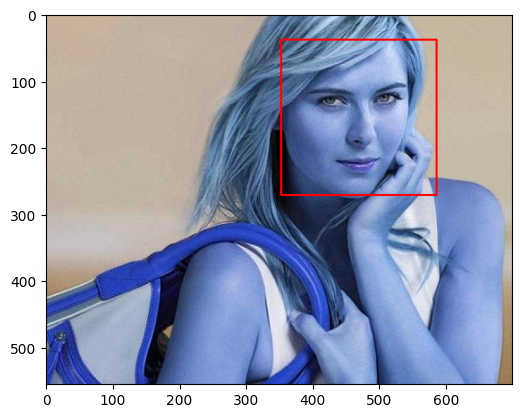

In [9]:
(x,y,w,h)=faces[0]
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0,),2)
plt.imshow(face_img)

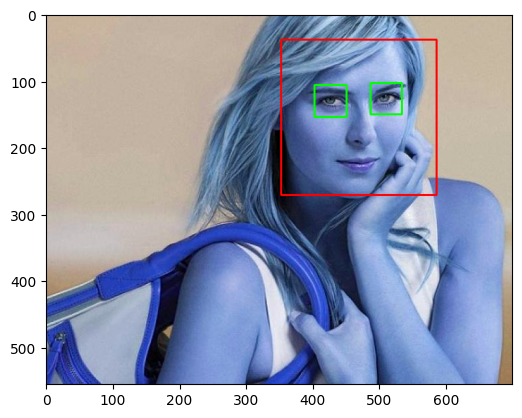

In [10]:
# eyes= eye_cascade.detectMultiScale(gray,1.3,5)
# eyes
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
  face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0,),2)
  roi_gray= gray[y:y+h, x:x+w]
  roi_color= face_img[y:y+h, x:x+w]
  eyes= eye_cascade.detectMultiScale(roi_gray)
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew, ey+eh), (0,255,0),2)

  plt.figure()
  plt.imshow(face_img, cmap='gray')
  # plt.show()



In [ ]:
# for eye in eyes:
#   (x,y,w,h)=eye
#   eye_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0,),2)
#   plt.imshow(eye_img)

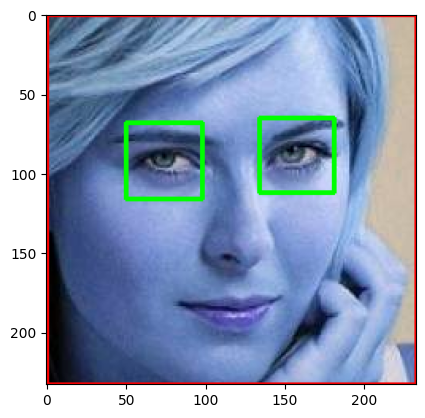

In [11]:
plt.imshow(roi_color, cmap='gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
  img= cv2.imread(image_path)
  if img is None:
        print(f"Failed to read image: {image_path}")
        return None
  gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces= face_cascade.detectMultiScale(gray,1.3,5)
  for (x,y,w,h) in faces:
    roi_gray= gray[y:y+h, x:x+w]
    roi_color= img[y:y+h, x:x+w]
    eyes= eye_cascade.detectMultiScale(roi_gray)
    if len(eyes)>=2:
      return roi_color


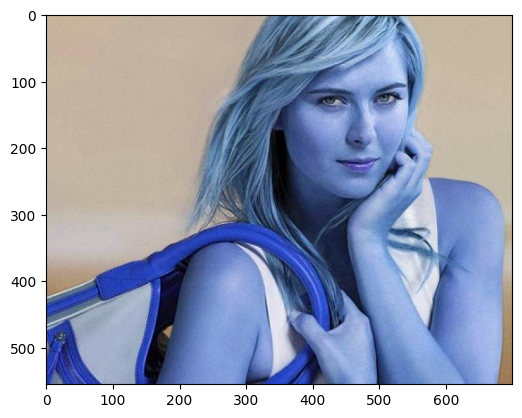

In [13]:
orginal_img= cv2.imread('/content/drive/MyDrive/Image classification project/model/test_images/sharapova1.jpg')
plt.imshow(orginal_img)

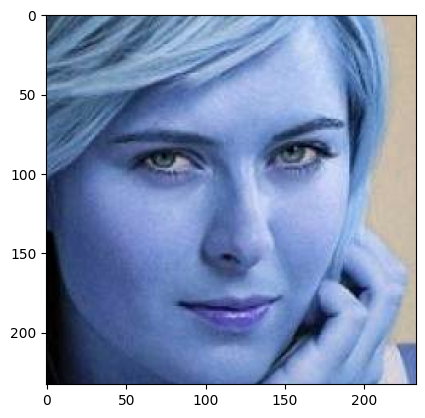

In [14]:
crop_img= get_cropped_image_if_2_eyes('/content/drive/MyDrive/Image classification project/model/test_images/sharapova1.jpg')
plt.imshow(crop_img)

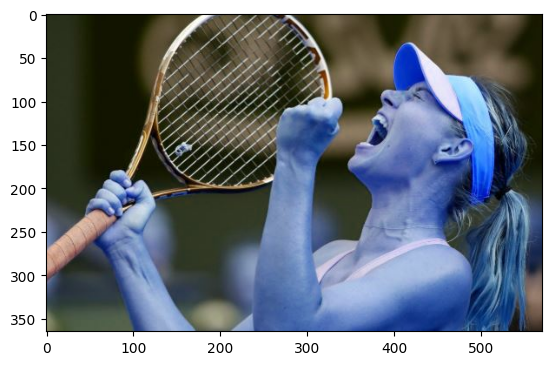

In [ ]:
orginal_img= cv2.imread('/content/drive/MyDrive/Image classification project/model/test_images/sharapova2.JPG')
plt.imshow(orginal_img)

In [ ]:
# crop_img= get_cropped_image_if_2_eyes('/content/drive/MyDrive/Image classification project/model/test_images/sharapova2.JPG')
# if crop_img is not None:
#   plt.imshow(crop_img)

In [15]:
path_to_data= '/content/drive/MyDrive/Image classification project/model/dataset'
path_to_cr_data= '/content/drive/MyDrive/Image classification project/model/dataset/cropped_imgs/'


In [16]:
import os
img_dirs= []
for entry in os.scandir(path_to_data):
  if entry.is_dir():
    img_dirs.append(entry.path)
img_dirs
# for entry in img_dirs:
#   print(path_to_data+'/'+entery)

['/content/drive/MyDrive/Image classification project/model/dataset/roger_federer',
 '/content/drive/MyDrive/Image classification project/model/dataset/maria_sharapova',
 '/content/drive/MyDrive/Image classification project/model/dataset/virat_kohli',
 '/content/drive/MyDrive/Image classification project/model/dataset/cropped_imgs12',
 '/content/drive/MyDrive/Image classification project/model/dataset/serena_williams',
 '/content/drive/MyDrive/Image classification project/model/dataset/lionel_messi',
 '/content/drive/MyDrive/Image classification project/model/dataset/.ipynb_checkpoints']

In [17]:
import shutil
if os.path.exists(path_to_cr_data):
  shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)


In [18]:
cropped_image_dirs=[]
celebrity_file_names_dict={}

for img_dir in img_dirs:
  count=1
  celebrity_name= img_dir.split('/')[-1]
  if celebrity_name== 'cropped_imgs12':
    continue
  celebrity_file_names_dict[celebrity_name]=[]

  for entry in os.scandir(img_dir):
    roi_color= get_cropped_image_if_2_eyes(entry.path)
    if roi_color is not None:
      cropped_folder= path_to_cr_data+celebrity_name
      if not os.path.exists(cropped_folder):
        os.makedirs(cropped_folder)
        cropped_image_dirs.append(cropped_folder)
        print("generating cropped images in folder: ", cropped_folder)
      cropped_file_name= celebrity_name+str(count)+'.png'
      cropped_file_path= cropped_folder+'/'+cropped_file_name
      # cv2.imwrite(cropped_file_path, roi_color)
      celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
      count+=1




generating cropped images in folder:  /content/drive/MyDrive/Image classification project/model/dataset/cropped_imgs/roger_federer
generating cropped images in folder:  /content/drive/MyDrive/Image classification project/model/dataset/cropped_imgs/maria_sharapova
generating cropped images in folder:  /content/drive/MyDrive/Image classification project/model/dataset/cropped_imgs/virat_kohli
generating cropped images in folder:  /content/drive/MyDrive/Image classification project/model/dataset/cropped_imgs/serena_williams
generating cropped images in folder:  /content/drive/MyDrive/Image classification project/model/dataset/cropped_imgs/lionel_messi


In [19]:
!pip install pyWavelets
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray= cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray = np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H= list(coeffs)
    coeffs_H[0] *= 0

    # reconstruction
    imArray_H= pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)

    return imArray_H

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 58.1 MB/s eta 0:00:00


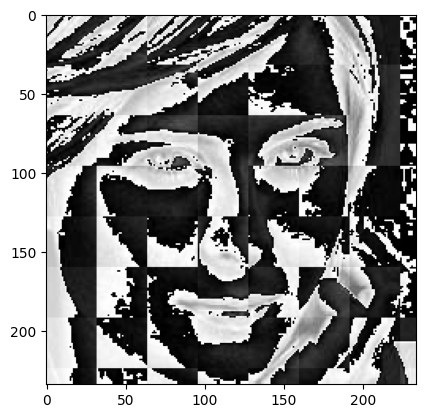

In [20]:
im_har = w2d(crop_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
celebrity_file_names_dict

{'roger_federer': ['/content/drive/MyDrive/Image classification project/model/dataset/cropped_imgs/roger_federer/roger_federer1.png',
  '/content/drive/MyDrive/Image classification project/model/dataset/cropped_imgs/roger_federer/roger_federer2.png',
  '/content/drive/MyDrive/Image classification project/model/dataset/cropped_imgs/roger_federer/roger_federer3.png',
  '/content/drive/MyDrive/Image classification project/model/dataset/cropped_imgs/roger_federer/roger_federer4.png',
  '/content/drive/MyDrive/Image classification project/model/dataset/cropped_imgs/roger_federer/roger_federer5.png',
  '/content/drive/MyDrive/Image classification project/model/dataset/cropped_imgs/roger_federer/roger_federer6.png',
  '/content/drive/MyDrive/Image classification project/model/dataset/cropped_imgs/roger_federer/roger_federer7.png',
  '/content/drive/MyDrive/Image classification project/model/dataset/cropped_imgs/roger_federer/roger_federer8.png',
  '/content/drive/MyDrive/Image classification 

In [23]:
class_dict= {}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
  class_dict[celebrity_name]= count
  count= count+1
class_dict


{'roger_federer': 0,
 'maria_sharapova': 1,
 'virat_kohli': 2,
 'serena_williams': 3,
 'lionel_messi': 4,
 '.ipynb_checkpoints': 5}

In [24]:
X=[]
y=[]
for celebrity_name, training_files in celebrity_file_names_dict.items():
  for training_image in training_files:
    img= cv2.imread(training_image)
    if img is None:
      continue
    scalled_raw_img= cv2.resize(img, (32,32))
    img_har= w2d(img,'db1',5)
    scalled_img_har= cv2.resize(img_har, (32,32))
    combined_img= np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
    X.append(combined_img)
    y.append(class_dict[celebrity_name])

In [25]:
len(X[0])

4096

In [38]:
# y

In [26]:
X= np.array(X).reshape(len(X),4096).astype(float)
X.shape

(168, 4096)

In [27]:
X[0]

array([119.,  99., 103., ...,  20.,  57., 210.])

we will use SVM

In [28]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [29]:
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=0)
pipe= Pipeline([('scaler', StandardScaler()),('svc', SVC(kernel='rbf', C=10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8333333333333334

In [31]:
print(classification_report(y_test, pipe.predict(X_test)))
len(X_test)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.78      0.88      0.82         8
           2       0.90      0.75      0.82        12
           3       0.71      0.83      0.77         6
           4       0.90      0.90      0.90        10

    accuracy                           0.83        42
   macro avg       0.83      0.84      0.83        42
weighted avg       0.84      0.83      0.83        42



42

grid search

In [32]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [33]:
model_params= {
    'svm': {
        'model': svm.SVC(gamma='auto', probability=True),
        'params': {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf', 'linear']
        }
  },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}


In [35]:
scores= []
best_estimators= {}
import pandas as pd
for algo, mp in model_params.items():
  pipe= make_pipeline(StandardScaler(), mp['model'])
  clf= GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
  clf.fit(X_train, y_train)
  scores.append({
      'model': algo,
      'best_score': clf.best_score_,
      'best_params': clf.best_params_
  })
  best_estimators[algo]= clf.best_estimator_

df= pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.808923,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.642462,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.793846,{'logisticregression__C': 1}


In [36]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [37]:
best_estimators['svm'].score(X_test, y_test)

0.8571428571428571

In [38]:
best_estimators['random_forest'].score(X_test, y_test)

0.6904761904761905

In [39]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.9047619047619048

In [40]:
best_clf= best_estimators['logistic_regression']

In [41]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 5,  1,  0,  0,  0],
       [ 0,  8,  0,  0,  0],
       [ 0,  0, 11,  0,  1],
       [ 0,  2,  0,  4,  0],
       [ 0,  0,  0,  0, 10]])

Text(95.72222222222221, 0.5, 'Truth')

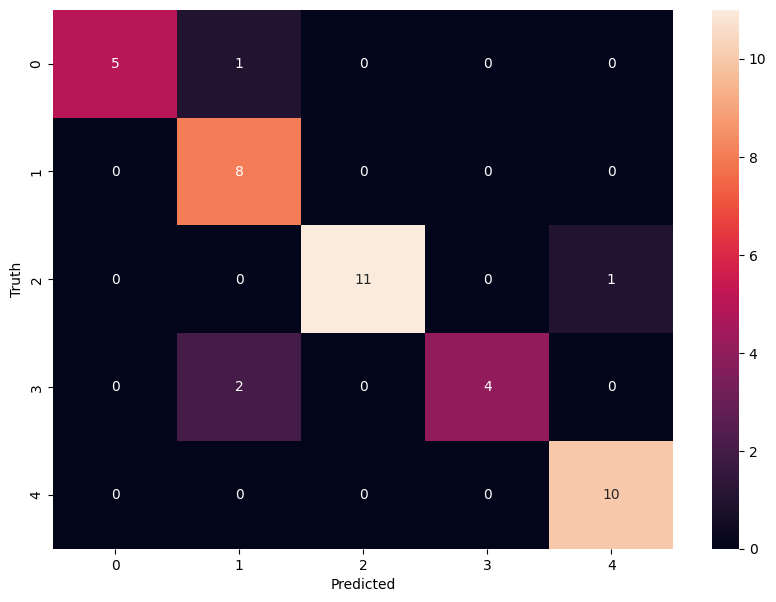

In [42]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
class_dict


{'roger_federer': 0,
 'maria_sharapova': 1,
 'virat_kohli': 2,
 'serena_williams': 3,
 'lionel_messi': 4,
 '.ipynb_checkpoints': 5}

In [44]:
!pip install joblib
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']